# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [4]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data


training_file = '../traffic-signs-data/train.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [5]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = format(X_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.

n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [6]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import csv
reader = csv.reader(open('signnames.csv', 'r'))
d = {}
for row in reader:
   k, v = row
   if k.isdigit():
       d[int(k)] = v

unique, counts = np.unique(y_train, return_counts = True)
unique = [d[u] for u in unique]
print(dict(zip(unique, counts)))
# print(d[str(y_train[n])])
# plt.imshow(X_train[n])

{'Keep right': 2070, 'Yield': 2160, 'Speed limit (100km/h)': 1440, 'No passing': 1470, 'Road work': 1500, 'Speed limit (50km/h)': 2250, 'Speed limit (120km/h)': 1410, 'Vehicles over 3.5 metric tons prohibited': 420, 'End of no passing': 240, 'Beware of ice/snow': 450, 'Roundabout mandatory': 360, 'Speed limit (80km/h)': 1860, 'General caution': 1200, 'No vehicles': 630, 'Speed limit (20km/h)': 210, 'Double curve': 330, 'Keep left': 300, 'Dangerous curve to the left': 210, 'Road narrows on the right': 270, 'Speed limit (30km/h)': 2220, 'Children crossing': 540, 'End of no passing by vehicles over 3.5 metric tons': 240, 'Dangerous curve to the right': 360, 'Turn right ahead': 689, 'Pedestrians': 240, 'Right-of-way at the next intersection': 1320, 'Go straight or left': 210, 'Turn left ahead': 420, 'Speed limit (60km/h)': 1410, 'Ahead only': 1200, 'Wild animals crossing': 780, 'No passing for vehicles over 3.5 metric tons': 2010, 'Speed limit (70km/h)': 1980, 'Bicycles crossing': 270, 'En

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)



### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [8]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
num_train = int(n_train * .8)
num_validation = n_train-num_train

X_validation = X_train[num_train:]
y_validation = y_train[num_train:]
X_train = X_train[0:num_train]
y_train = y_train[0:num_train]

n_train = num_train
n_validation = num_validation

print('number of train examples = {}'.format(n_train))
print('number of validation examples = {}'.format(n_validation))


number of train examples = 31367
number of validation examples = 7842


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x4.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 4), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(4))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    

#     SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x4.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 14x14x4.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 4, 4), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(4))
    conv1   = tf.nn.conv2d(conv1, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Layer 2: Convolutional. Output = 20x20x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 4, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 300), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(300))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(300, 168), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(168))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43 (n_classes).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(168, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** It is a convolutional neural network with three convoltional layers each followed by ReLU non linear activation. The first and third convolution layers are followed by max pooling layers to prevent overfitting. At the end, there are two fully connected layers to reduce the feature space to a vector of size 43 (the total number of distinct traffic signs that the network learns.

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

BATCH_SIZE = 128
EPOCHS = 40
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic-net')
    print("Model saved")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ...
Validation Accuracy = 0.646

EPOCH 2 ...
Validation Accuracy = 0.836

EPOCH 3 ...
Validation Accuracy = 0.889

EPOCH 4 ...
Validation Accuracy = 0.914

EPOCH 5 ...
Validation Accuracy = 0.930

EPOCH 6 ...
Validation Accuracy = 0.944

EPOCH 7 ...
Validation Accuracy = 0.933

EPOCH 8 ...
Validation Accuracy = 0.957

EPOCH 9 ...
Validation Accuracy = 0.944

EPOCH 10 ...
Validation Accuracy = 0.956

EPOCH 11 ...
Validation Accuracy = 0.954

EPOCH 12 ...
Validation Accuracy = 0.957

EPOCH 13 ...
Validation Accuracy = 0.959

EPOCH 14 ...
Validation Accuracy = 0.959

EPOCH 15 ...
Validation Accuracy = 0.963

EPOCH 16 ...
Validation Accuracy = 0.958

EPOCH 17 ...
Validation Accuracy = 0.966

EPOCH 18 ...
Validation Accuracy = 0.961

EPOCH 19 ...
Validation Accuracy = 0.959

EPOCH 20 ...
Validation Accuracy = 0.963

EPOCH 21 ...
Validation Accuracy = 0.964

EPOCH 22 ...
Validation Accuracy = 0.972

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** The model was trained using AdamOptimizer using an initial learning rate of 0.001, batch size of 128. The training was run for 40 epochs. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I started my solution by slightly modifying the LeNet architecture for handwritten digits recognition. Since the input images are composed of three channels, I had to change the first convolutional layer to accept three input channels. The modifications are as follows: 
1. The first convolution layer has 3 input channels instead of 1. 
2. The first convolution layer has 4 output channels instead of 6.
3. Added an extra convolution layer after the first convolution layer with a receptive field size of 3X3 and 4 output features.
4. The third convolution layer is changed to accept 4 input channels instead of 6.
5. The first fully connected layer is changed to output 300 features instead of 120.
6. The second fully connected layer is changed to output 168 features instead of 84. Also it takes in 300 input features instead of 120.
7. The third fully connected layer is changed to output 43 output features. Also it takes in 168 input features instead of 84.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Ahead only
Children crossing
Right-of-way at the next intersection
No entry
No passing


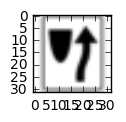

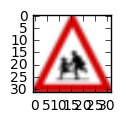

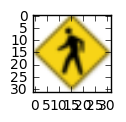

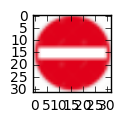

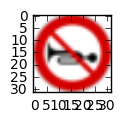

In [68]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

signs = {}
f = open('signnames.csv', 'r')
c = 0
for line in f.readlines():
    c = c + 1
    if c == 1:
        continue
    
    s = line.strip().split(',')
    code = int(s[0])
    name = s[1]
    signs[code] = name
    

import scipy
import glob

files = ['30.png']

prediction = tf.argmax(logits, 1)

sess = tf.Session()
saver = tf.train.import_meta_graph('traffic-net.meta')
saver.restore(sess, tf.train.latest_checkpoint('./'))
all_vars = tf.get_collection('vars')
for v in all_vars:
    sess.run(v)

for fname in glob.glob('./test/*.*'):
    image = scipy.misc.imresize(scipy.misc.imread(fname), (32, 32, 3))
    plt.figure(figsize=(1,1))
#     print('image shape = {}'.format(image.shape))
    plt.imshow(image, cmap="gray")  
    image = image.reshape(1, 32, 32, 3)
    p = sess.run(prediction, feed_dict={x: image})
    print(signs[p[0]])



# indexes = np.random.randint(0, len(X_test), size=5)

# for index in indexes:
#     image = X_train[index].squeeze()
#     plt.figure(figsize=(1,1))
#     print('image shape = {}'.format(image.shape))
#     plt.imshow(image, cmap="gray")
#     image = image.reshape(1, 32, 32, 3)
#     p = sess.run(prediction, feed_dict={x: image})
#     print(signs[p[0]])
    
#     print(signs[y_train[index]])
    



    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** Two of the five images I found in a quick google search were not recognized correctly. One was "keep-right' image which was falsely classified as 'ahead only' and the 'no honking' which was incorrectly recognized as 'no-passing'. The first mis-classification is probably because the keep-right signs in Germany and USA are different. The second mis-classification is because the training set does not contain any labelled images for 'no-honking'.

In [72]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

indexes = np.random.randint(0, len(X_test), size=5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for index in indexes:
        test_accuracy = evaluate(X_test[index:index+1], y_test[index:index+1])
        print('Test accuracy = {:0.3f}'.format(test_accuracy))

Test accuracy = 1.000
Test accuracy = 1.000
Test accuracy = 1.000
Test accuracy = 1.000
Test accuracy = 1.000


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** No, the model is about 60% accurate on the captured images, while on the test dataset it is about 80% accurate.

predictions = ['Ahead only', 'Road work', 'Yield', 'Stop', 'Bicycles crossing']
predictions = ['Children crossing', 'Traffic signals', 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Right-of-way at the next intersection']
predictions = ['Right-of-way at the next intersection', 'Speed limit (60km/h)', 'Speed limit (80km/h)', 'Children crossing', 'Bicycles crossing']
predictions = ['No entry', 'Slippery road', 'No passing', 'Turn right ahead', 'Double curve']
predictions = ['No passing', 'Double curve', 'Right-of-way at the next intersection', 'Road narrows on the right', 'No entry']


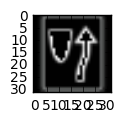

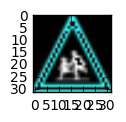

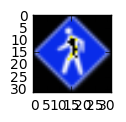

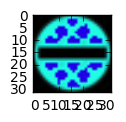

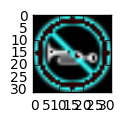

In [83]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

sess = tf.Session()
saver = tf.train.import_meta_graph('traffic-net.meta')
saver.restore(sess, tf.train.latest_checkpoint('./'))
all_vars = tf.get_collection('vars')
for v in all_vars:
    sess.run(v)
    
test_images = np.zeros((5, 32, 32, 3))
i = 0
for fname in glob.glob('./test/*.*'):
    test_images[i] = scipy.misc.imresize(scipy.misc.imread(fname), (32, 32, 3))
    plt.figure(figsize=(1,1))

    plt.imshow(test_images[i])
    i += 1

p = sess.run(prediction, feed_dict={x: test_images})
# l = sess.run(logits, feed_dict={x: test_images})



top_k = sess.run(tf.nn.top_k(logits, k=5), feed_dict={x:test_images})
for i in range(5):
    print('top 5 predictions = {}'.format([signs[code] for code in top_k.indices[i]]))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** In my case since, one of the test images (no-honking) was not even in the original training set, it is not present in the top 5 predictions, as expected. The other incorrectly classified image is also not present in the top 5 predictions because the training set did not contain this type of sign.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.